# Import Packages and Data

In [180]:
#importing necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [56]:
#import data
training_data=pd.read_csv('Resources/train_cleaned.csv')
training_data.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [57]:
#import data without outliers to test differences
training_data_without_outliers=pd.read_csv('Resources/train_cleaned_without_outliers.csv')
training_data_without_outliers.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [58]:
training_data.shape

(33705, 19)

In [59]:
training_data_without_outliers.shape

(31801, 19)

# Organize Data

In [60]:
#Set up features and targets
data = training_data.drop(columns=['ID', 'Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount'])
target = training_data[['Credit_Score']].values.ravel()
column_names = data.columns.tolist()

In [61]:
#Set up features and targets but this time for data without outliers
data_wo = training_data_without_outliers.drop(columns=['ID', 'Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount'])
target_wo = training_data_without_outliers[['Credit_Score']].values.ravel()
column_names = data.columns.tolist()

In [62]:
#Split data into train and split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [63]:
#Split data into train and split without outliers
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(
    data_wo, target_wo, random_state=0)

In [148]:
#Function to return a chart of the most important features
def plot_feature_importances(model, filename, title):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), column_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title(title)
    
    # Save the plot as an image
    filepath = os.path.join('figures', filename)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

# Model 1 - Simple Decision Tree

In [128]:
#Train decision tree model and show accuracy
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.663


In [129]:
#Evaluate the model
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

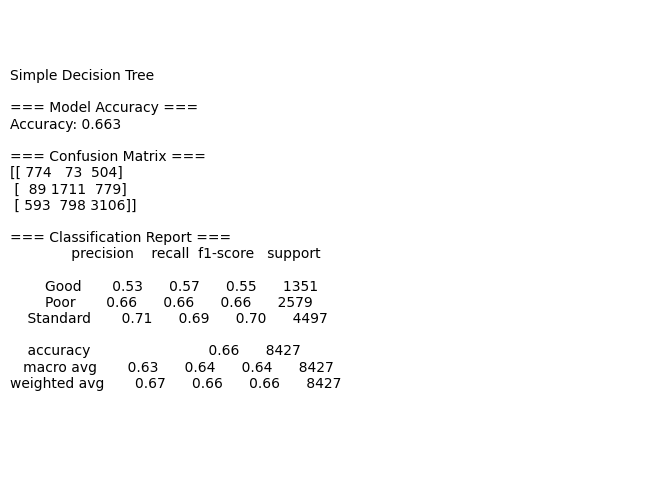

In [139]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Decision Tree\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model1-simple_decision_tree_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

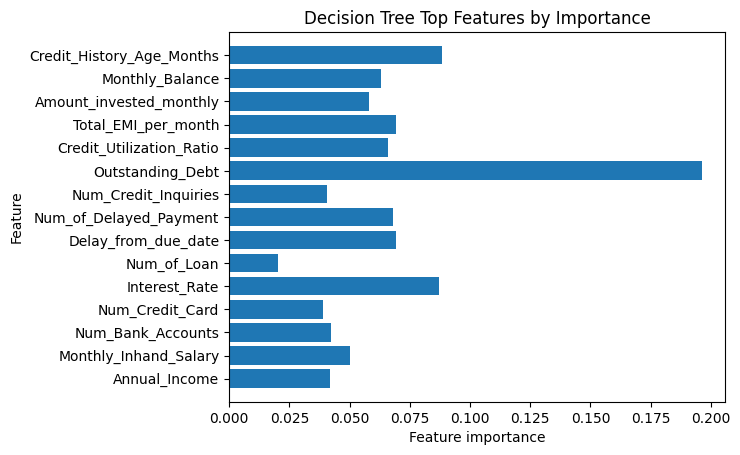

In [150]:
#Graph most important features and save figure
plot_feature_importances(tree, "model1-simple_decision_tree_ranking_features.png", "Decision Tree Top Features by Importance")

In [151]:
#Show printed Decision Tree
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- Outstanding_Debt <= 1485.53
|   |--- Num_of_Delayed_Payment <= 7.50
|   |   |--- Delay_from_due_date <= 15.50
|   |   |   |--- Num_Credit_Card <= 2.50
|   |   |   |   |--- Interest_Rate <= 9.50
|   |   |   |   |   |--- Amount_invested_monthly <= 441.80
|   |   |   |   |   |   |--- Monthly_Balance <= 197.84
|   |   |   |   |   |   |   |--- Num_of_Loan <= 52.00
|   |   |   |   |   |   |   |   |--- class: Standard
|   |   |   |   |   |   |   |--- Num_of_Loan >  52.00
|   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |--- Monthly_Balance >  197.84
|   |   |   |   |   |   |   |--- Outstanding_Debt <= 187.60
|   |   |   |   |   |   |   |   |--- Num_Credit_Inquiries <= 4.50
|   |   |   |   |   |   |   |   |   |--- Total_EMI_per_month <= 64.49
|   |   |   |   |   |   |   |   |   |   |--- Credit_History_Age_Months <= 248.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Credit_History_Age_Mont

# Model 2 - Simple Decision Tree But Without Outliers

In [185]:
#Train decision tree model and show accuracy
tree_wo = DecisionTreeClassifier(random_state=0)
tree_wo.fit(X_train_wo, y_train_wo)

print("Accuracy on training set without outliers: {:.3f}".format(tree_wo.score(X_train_wo, y_train_wo)))
print("Accuracy on test set without outliers: {:.3f}".format(tree_wo.score(X_test_wo, y_test_wo)))

Accuracy on training set without outliers: 1.000
Accuracy on test set without outliers: 0.654


In [186]:
#Evaluate the model
y_pred = tree_wo.predict(X_test_wo)
accuracy = accuracy_score(y_test_wo, y_pred)
conf_matrix = confusion_matrix(y_test_wo, y_pred)
class_report = classification_report(y_test_wo, y_pred)

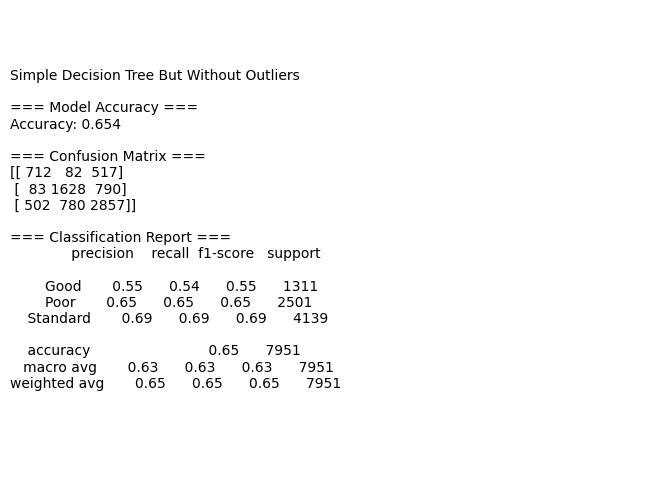

In [187]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Decision Tree But Without Outliers\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model2-simple_decision_tree_without_outliers_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

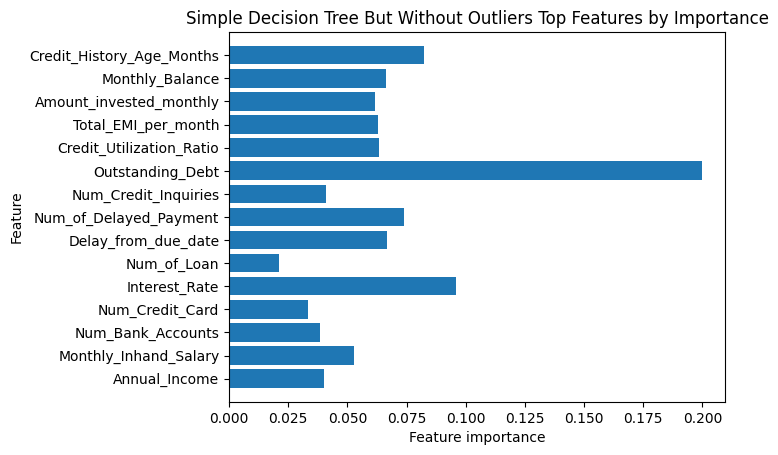

In [188]:
#Graph most important features and save figure
plot_feature_importances(tree_wo, "model2-simple_decision_tree_without_outliers_top_features.png", "Simple Decision Tree But Without Outliers Top Features by Importance")

# Model 3 - Simple Random Forest Classifier

In [190]:
#Train random forest model and show accuracy
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [191]:
#Evaluate the model
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

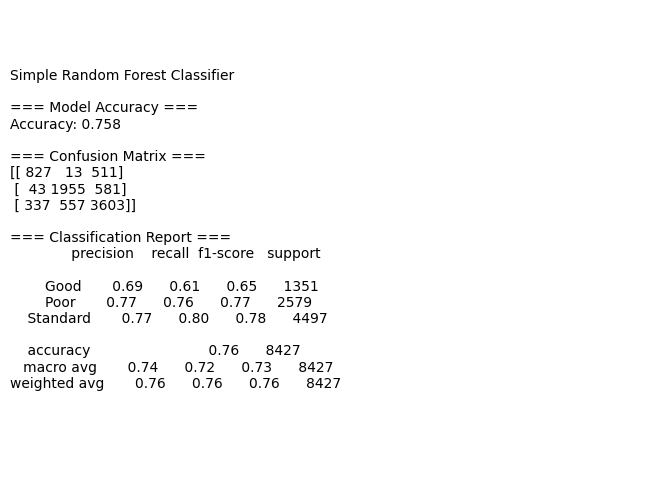

In [192]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Random Forest Classifier\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model3-simple_random_forest_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

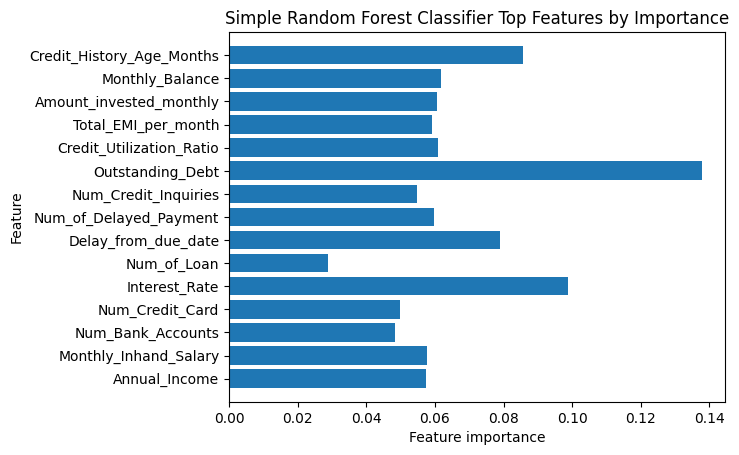

In [193]:
#Graph most important features and save figure
plot_feature_importances(forest, "model3-simple_random_forest_top_features.png", "Simple Random Forest Classifier Top Features by Importance")

# Model 4 - Simple Random Forest Classifier but Without Outliers

In [162]:
#Train random forest model and show accuracy
forest_wo = RandomForestClassifier(n_estimators=100, random_state=0)
forest_wo.fit(X_train_wo, y_train_wo)

print("Accuracy on training set: {:.3f}".format(forest_wo.score(X_train_wo, y_train_wo)))
print("Accuracy on test set: {:.3f}".format(forest_wo.score(X_test_wo, y_test_wo)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


In [163]:
#Evaluate the model
y_pred = forest_wo.predict(X_test_wo)
accuracy = accuracy_score(y_test_wo, y_pred)
conf_matrix = confusion_matrix(y_test_wo, y_pred)
class_report = classification_report(y_test_wo, y_pred)

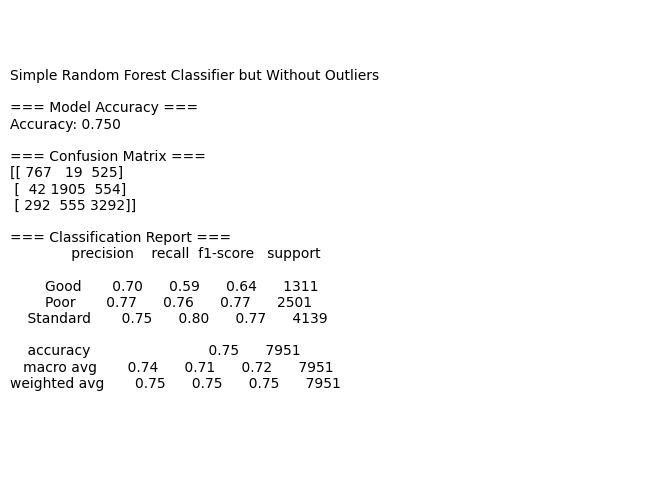

In [164]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Random Forest Classifier but Without Outliers\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model4-simple_random_forest__without_outliers_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

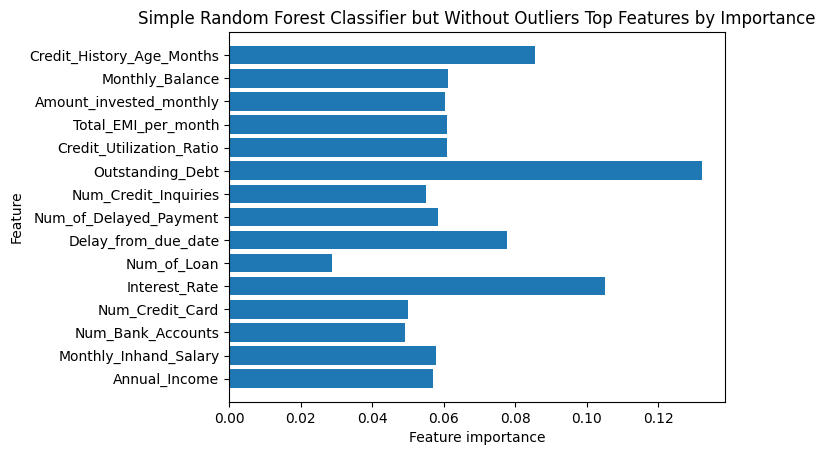

In [165]:
#Graph most important features and save figure
plot_feature_importances(forest_wo, "model4-simple_random_forest__without_outliers_ranking_features.png", "Simple Random Forest Classifier but Without Outliers Top Features by Importance")

# Model 5 - Using Gridsearch CV to determine best parameters for Random Forest Classifer

In [103]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'n_estimators': [50, 100, 200]
}

# Initialize Random Forest
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [166]:
#Train random forest model using best parameters and show accuracy
forest_best = RandomForestClassifier(
    n_estimators=200,          # Best value found
    max_depth=30,              # Best value found
    max_features='sqrt',       # Best value found
    min_samples_leaf=1,        # Best value found
    min_samples_split=2,       # Best value found
    bootstrap=False,           # Best value found
    random_state=0
)
forest_best.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_best.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_best.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.765


In [167]:
#Evaluate the model
y_pred = forest_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

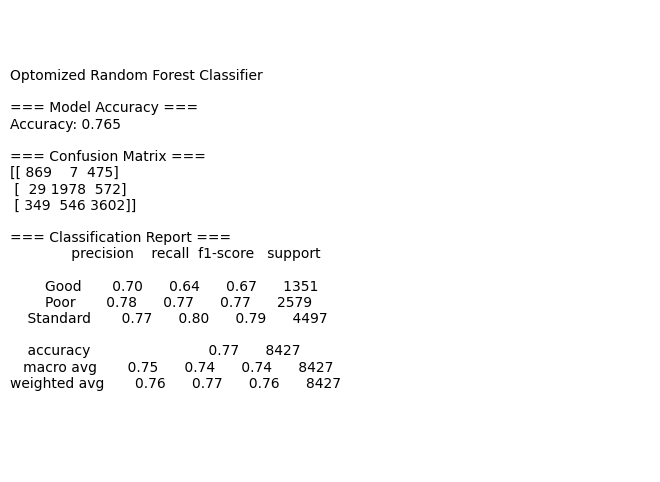

In [168]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Optomized Random Forest Classifier\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model5-optomized_random_forest__results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

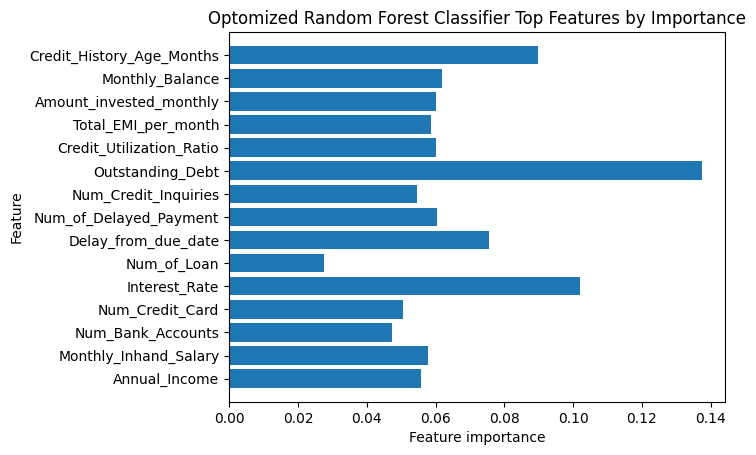

In [169]:
#Graph most important features and save figure
plot_feature_importances(forest_best, "model5-optomized_random_forest__top_features.png", "Optomized Random Forest Classifier Top Features by Importance")

# Model 6 - Simple Gradient Boosting Classifier

In [171]:
#Train gradient boosting model and show accuracy
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.703
Accuracy on test set: 0.692


In [172]:
#Evaluate the model
y_pred = gbrt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

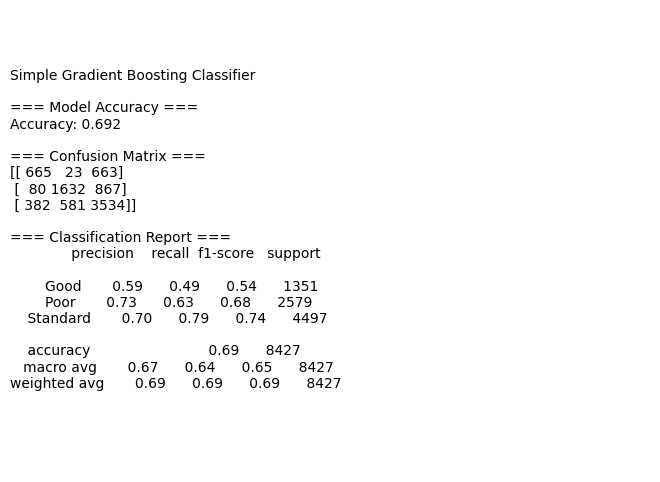

In [173]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Gradient Boosting Classifier\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model6-simple_gradient_boosting_classifier_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

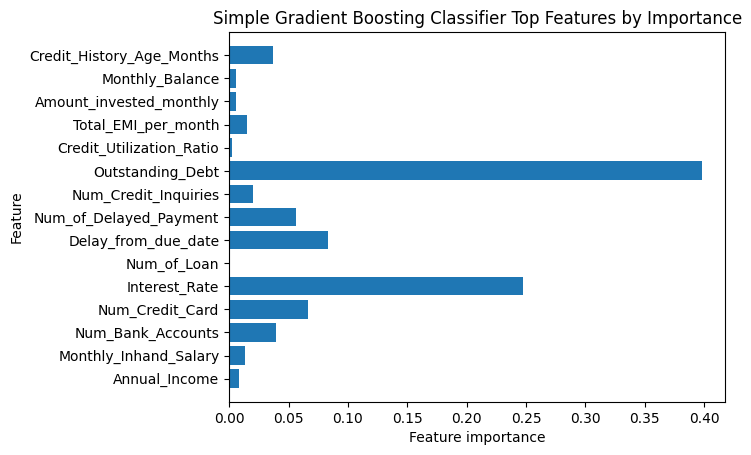

In [174]:
#Graph most important features and save figure
plot_feature_importances(gbrt, "model6-simple_gradient_boosting_classifier_top_features.png", "Simple Gradient Boosting Classifier Top Features by Importance")

# Model 7 - Simple Gradient Boosting Machine but Without Outliers

In [175]:
#Train gradient boosting model and show accuracy
gbrt_wo = GradientBoostingClassifier(random_state=0)
gbrt_wo.fit(X_train_wo, y_train_wo)

print("Accuracy on training set without outliers: {:.3f}".format(gbrt_wo.score(X_train_wo, y_train_wo)))
print("Accuracy on test set without outliers: {:.3f}".format(gbrt_wo.score(X_test_wo, y_test_wo)))

Accuracy on training set without outliers: 0.705
Accuracy on test set without outliers: 0.684


In [176]:
#Evaluate the model
y_pred = gbrt_wo.predict(X_test_wo)
accuracy = accuracy_score(y_test_wo, y_pred)
conf_matrix = confusion_matrix(y_test_wo, y_pred)
class_report = classification_report(y_test_wo, y_pred)

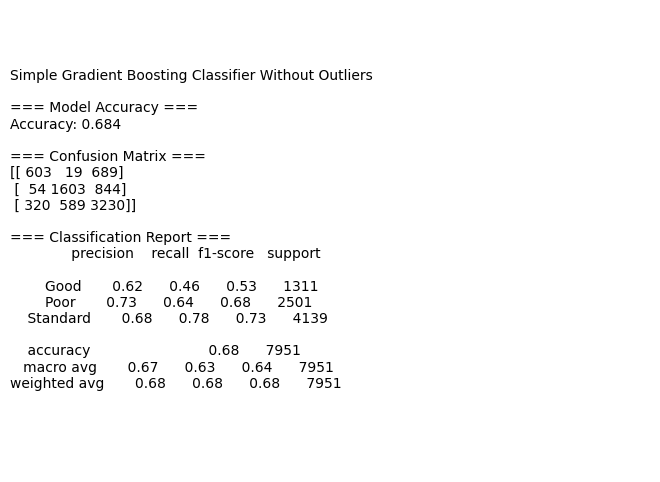

In [178]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Simple Gradient Boosting Classifier Without Outliers\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model7-simple_gradient_boosting_classifier_without_outliers_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

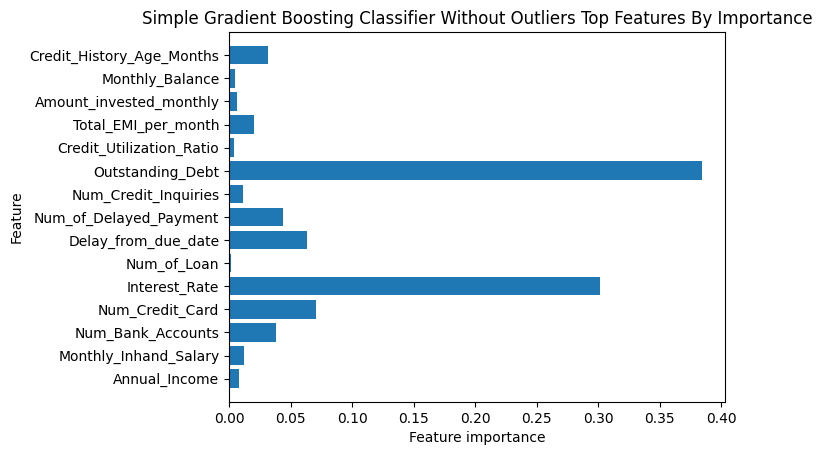

In [179]:
#Graph most important features and save figure
plot_feature_importances(gbrt_wo, "model7-simple_gradient_boosting_classifier_without_outliers_top_features.png", "Simple Gradient Boosting Classifier Without Outliers Top Features By Importance")

# Model 8 - Gradient Boosting Machine optimized using Gridsearch CV to find best parameters

In [72]:
# Define the parameter grid
param_grid = {
    'max_depth': [1, 3, 5],  # Test varying tree depths
    'learning_rate': [0.01, 0.1, 0.2],  # Test different learning rates
    'n_estimators': [50, 100, 200]  # (Optional) Test varying numbers of estimators
}


In [70]:
# Initialize Gradient Booster
gb = GradientBoostingClassifier()
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  
    verbose=1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.70875839656187


In [73]:
#Set up a new parameter grid because previous one was all maxed values
param_grid2 = {
    'max_depth': [3, 5, 7],  # Test varying tree depths
    'learning_rate': [0.1, 0.3, 0.5],  # Test different learning rates
    'n_estimators': [100, 300, 500]  # (Optional) Test varying numbers of estimators
}

In [75]:
# Initialize Gradient Booster
gb = GradientBoostingClassifier()
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid2,
    scoring='accuracy',  # Or another metric like 'roc_auc' or 'f1'
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.7297249245639735


In [181]:
#Train gradient boosting model using best parameters and show accuracy
gbrt_best = GradientBoostingClassifier(random_state=0, learning_rate=0.3, max_depth=7, n_estimators=300)
gbrt_best.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_best.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_best.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.749


In [182]:
#Evaluate the model
y_pred = gbrt_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

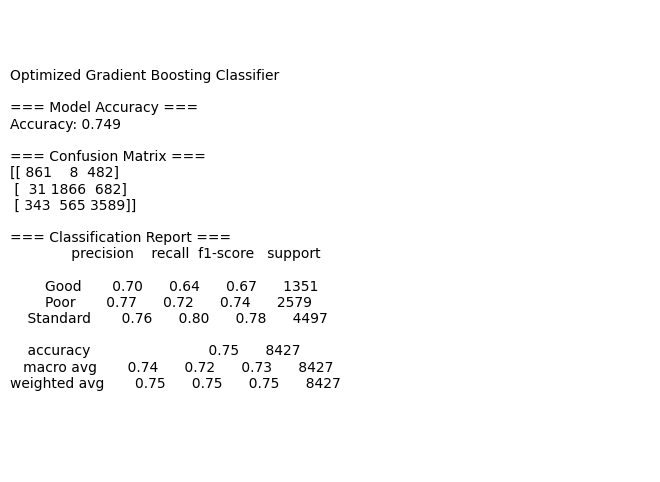

In [183]:
#Print Results and image to folder
folder_path = "figures"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

results_text = (
    "Optimized Gradient Boosting Classifier\n\n"
    "=== Model Accuracy ===\n"
    f"Accuracy: {accuracy:.3f}\n\n"
    "=== Confusion Matrix ===\n"
    f"{conf_matrix}\n\n"
    "=== Classification Report ===\n"
    f"{class_report}"
)

# Add the text to the figure
fig.text(0.1, 0.5, results_text, fontsize=10, va='center', ha='left', wrap=True)

# Save the figure
file_path = os.path.join(folder_path, "model8-optimized_gradient_boosting_classifier_results.png")
plt.savefig(file_path, bbox_inches='tight')
plt.show()

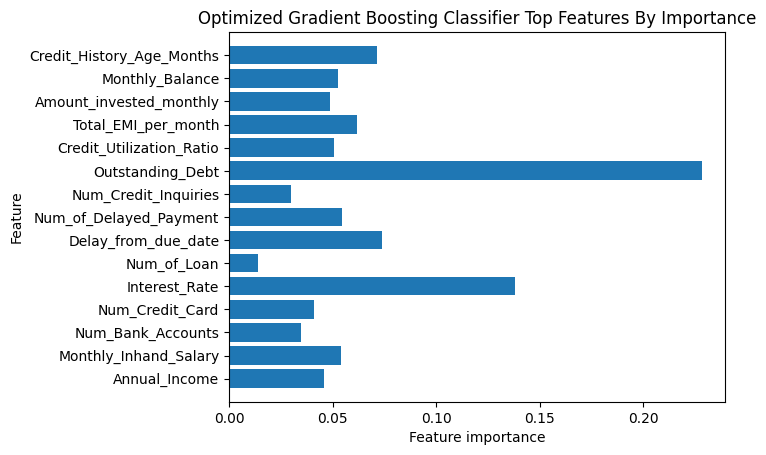

In [184]:
#Graph most important features and save figure
plot_feature_importances(gbrt_best, "model8-optimized_gradient_boosting_classifier_top_features.png", "Optimized Gradient Boosting Classifier Top Features By Importance")